# Research on apartment sales ads

We have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. We need to learn how to determine the market value of real estate properties. The task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

In [2]:
raw_data = pd.read_csv('real_estate_data_us.csv', sep='\t')
raw_data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [3]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

In [4]:
raw_data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


### Conclusion

We have a dataset of ads with **22** variables and **23 699** ad posts. There's a list of **14** variables with missing values, namely: 
- days_listed 
    - **Reason:** probably the ad was still active at the moment of export **OR** there was a calculation exception 
    - **Data type**: is float but for our analysis integer would be fine. We should **convert** to int.
    - **Replacement**: If we knew the date of data export we could calculate the field as a difference between *export* and *post* dates assuming that missing value mean 'still active ad' but for now replace with the difference between the max post date and the ad post date.
    - **Distribution**: typical values are from 45 to 232 (**median 95**) days but there're 'big' and 'small' outliers.
- kitchen_area 
    - **Reason:** either export error or simply the area was not entered or unknown 
    - **Data type**: float is fine for area.
    - **Replacement**: kitchen area may depend on *total_area* but for simplicity let's replace with mean or median value
    - **Distribution**: typical values are from 7 to 12 sq.m (**median 9**) with 'big' and 'small' outliers.
- living_area, 
    - **Reason:** either export error or simply the area was not entered or unknown 
    - **Data type**: float is fine for area.
    - **Replacement**: living area may depend on *total_area*,  we can try linear regression to predict the value.
    - **Distribution**: typical values are from 18 to 42 sq.m (**median 30**) with 'big' and 'small' outliers.
- balconies, 
    - **Reason:** Perhaps the value was not entered for 'no balcony' cases.
    - **Data type**: float should be **converted** to integer.
    - **Replacement**: Let's replace with 0 assuming missing means no balcony
    - **Distribution**: typical values are 0,1 or 2 balconies though there're rare cases of >2 balconies.
- ceiling_height, 
    - **Reason:** either export error or simply the height was not entered or unknown 
    - **Data type**: float is fine for height.
    - **Replacement**: let's replace with mean or median value
    - **Distribution**: typical values are from 2.52 to 2.80 m (**median 2.65**) with 'big' and 'small' outliers: values 1m and 100m not seem realistic. Perhaps typos that should be filtered out.   
- floors_total, 
    - **Reason:** either export error or simply the number was not entered or unknown 
    - **Data type**: float should be **converted** to integer.
    - **Replacement**: let's replace with median value keeping in mind that *floor* value can be greater than *floors_total*. 
    - **Distribution**: typical values are from 5 to 16  (**median 9**) with 'big' and 'small' outliers.
- bike_parking, 
    - **Reason:** Seems that if missing then there's no bike parking
    - **Data type**: Should be bool.
    - **Replacement**: let's replace with False values. 
- locality_name  
    - **Reason:** either export error or input error 
    - **Data type**: String object is just fine.
    - **Replacement**: let's replace with 'undefined' value if other columns present otherwise get rid of such rows.
    
**Distance-related group** 
- airport_dist,
- city_center_dist,
- park_dist,
- parks_within_3000
- pond_dist
- ponds_within_3000
    - Based on count of missing values it seems that *airport_dist, city_center_dist, parks_within_3000 and ponds_within_3000* either simultaneously available or null (should be checked additionally). 
    - At the same time there's a few non-null values of *park_dist and pond_dist*. As we don't need these columns in our analysis we'll skip filling NaN values.
    - We can guess the values for *airport_dist, city_center_dist, parks_within_3000 and ponds_within_3000* based on *locality_name* taking median value for each group. If for some localities there's no values at all we should leave them without change. Filling in all the missing values is not critical for our analysis.
    - The **reason** these parameters are missing is the lack of information in the system (values are unknown or hard to determine) or there was a computation error for some localities (remember the distancies are computed automatically).   
    - We **need to convert** to int *parks_within_3000 and ponds_within_3000* columns if it will be possible to fill in all the missing values.
    - The parameters seem to have reasonable statistics, just *airport_dist* has values of 0 in some cases which can mean that the value is actually not known.

Additionally we should **convert** *date_posted* to datetime, *last_price* to int data types. 



### Step 2. Data preprocessing
From the previous step we have a plan to:
- Fill in missing values 
    - For *days_listed, kitchen_area, ceiling_height, floors_total* columns replace with **median** value
    - For *living_area* column replace based on **linear regression model**
    - For *balconies, bike_parking, locality_name* replace with **0, False** and **'Undefined'** correspondingly
- Change Data types and convert:
    - date_posted to datetime and fill *days_listed* as difference between the most late ad post and the current ad post date.
    - days_listed to int (probably the field was computed as difference between dates e.g. in seconds *divided* by the number of seconds in the day that's why it contains *fractional* values so the type is float)
    - last_price to int (seems to be integer in nature without non-zero fractional parts, so it can be an export issue or the values were stored in DB with zero fractional parts resulting in float format)
    - balconies to int (the field has NaN values so this is the reason it's float)
    - floors_total to int (the field has NaN values so this is the reason it's float)

as concluded in the step 1 conclusion.
- Additionally we need to check for duplicates.

In [5]:
raw_data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [6]:
raw_data.kitchen_area.describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [7]:
raw_data.floors_total.describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

To fill in missing values it's better to use the median, since we have extreme values 

In [8]:
# 1. Define columns for which we decided to replace missing values with median value.
replace_median_cols = [ 'kitchen_area', 'ceiling_height', 'floors_total']
for col in replace_median_cols:
    raw_data[col].fillna(raw_data[col].median(), inplace=True)

    
# 2. Check that the values in the listed 4 columns were replaced with median values
raw_data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,2.65,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,2.65,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,9.1,NaN,159.0,0.0,2.65,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


Try linear regression to predict values of living area based on total area.
Filter out missing values for living area and build a model based on the available values (for simplicity will not filter out outliers)

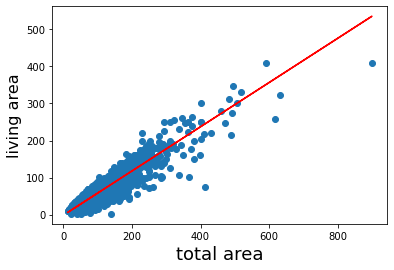

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.000000,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.600000,40.4,2.0,2.65,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.300000,56.0,0.0,2.65,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,9.1,93.457503,159.0,0.0,2.65,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.000000,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [9]:
# 3. Try linear regression to predict values of living area based on total area.
# Filter out missing values for living area and build a model based on the available values 
# (for simplicity will not filter out outliers)

X = raw_data.query('not living_area.isna()', engine='python')['total_area'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = raw_data.query('not living_area.isna()', engine='python')['living_area'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

# 4. Check visually that the model works fine for the training set
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('total area', fontsize=18)
plt.ylabel('living area', fontsize=16)
plt.show()

# 5. Replace missing values using the model and check that replacement worked
# predict method expects 2D array so we form it from float scalar as [[ val ]] 
# and after prediction extract the float back as [0,0]
raw_data['living_area'] = raw_data.apply((lambda row: linear_regressor.predict([[row['total_area']]])[0,0] if np.isnan(row['living_area']) else row['living_area']), axis=1)
raw_data.head()

Check rows with NaNs in locality_name. 
If other values are present we'll keep the rows just replacing the name with 'Undefined' value

In [10]:
# 6. Check rows with NaNs in locality_name. 
#    If other values are present we'll keep the rows just replacing the name with 'Undefined' value

raw_data.query('locality_name.isna()', engine='python').head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
1097,2016-04-15T00:00:00,147.0,172000.0,3,8.8,50.8,81.7,0.0,3.55,5.0,...,NaN,False,False,NaN,23478.0,4258.0,NaN,0.0,NaN,0.0
2033,2017-05-30T00:00:00,34.0,107960.0,3,18.6,42.6,80.0,0.0,2.65,4.0,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2603,2015-09-20T00:00:00,276.0,67035.0,1,10.7,15.6,42.7,0.0,2.65,24.0,...,NaN,False,False,NaN,22041.0,17369.0,NaN,0.0,374.0,1.0
2632,2015-10-11T00:00:00,256.0,102612.0,2,8.2,33.1,62.4,0.0,2.65,24.0,...,NaN,False,False,NaN,22041.0,17369.0,NaN,0.0,374.0,1.0
3574,2016-05-28T00:00:00,45.0,84000.0,2,6.5,30.8,46.5,0.0,2.65,5.0,...,NaN,False,False,NaN,27419.0,8127.0,NaN,0.0,603.0,1.0


Replace NaN in balconies, bike_parking and locality_name

In [11]:
# 7. Replace NaN in balconies, bike_parking and locality_name
raw_data['balconies'].fillna(0, inplace=True)
raw_data['bike_parking'].fillna(False, inplace=True)
raw_data['locality_name'].fillna('Undefined', inplace=True)

# check that replacement worked
raw_data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.000000,108.0,0.0,2.70,16.0,...,False,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.600000,40.4,2.0,2.65,11.0,...,False,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.300000,56.0,0.0,2.65,5.0,...,False,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,9.1,93.457503,159.0,0.0,2.65,14.0,...,False,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.000000,100.0,0.0,3.03,14.0,...,False,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


Build pivot table with median values of airport_dist, city_center_dist, parks_within_3000 and ponds_within_3000 for each locality

In [12]:
# 8. Build pivot table with median values of airport_dist, city_center_dist, parks_within_3000 and ponds_within_3000
# for each locality
loc_pivot = raw_data.pivot_table(index='locality_name', values=['airport_dist', 'city_center_dist', 'parks_within_3000', 'ponds_within_3000'], aggfunc='median')
loc_pivot


,airport_dist,city_center_dist,parks_within_3000,ponds_within_3000
locality_name,,,,
Aleksandrovskaya village,12896.5,27468.0,0.0,1.0
Beloostrov village,57769.0,38868.0,0.0,1.0
Kolpino,26232.0,32018.0,0.0,1.0
Krasnoye Selo,25715.5,29140.5,0.0,0.0
Kronshtadt,67850.0,49575.0,2.0,2.0
Levashovo village,52693.0,25727.0,0.0,0.0
Lisiy Nos village,55909.0,28226.0,0.0,0.0
Lomonosov,48415.5,51677.0,0.0,1.0
Metallostroy village,25758.0,27602.0,0.0,0.0


Look for localities that are not in pivot table due to lack of data in columns

In [13]:
# 9. Look for localities that are not in pivot table due to lack of data in columns
raw_data.query("locality_name not in @loc_pivot.index")['locality_name'].count()

4864

Replace NaN values with the corresponding median values taking values from the loc_pivot table

In [14]:
# 10. Replace NaN values with the corresponding median values taking values from the loc_pivot table

dist_cols = ['airport_dist', 'city_center_dist', 'parks_within_3000', 'ponds_within_3000']

for col in dist_cols:
    raw_data[col] = raw_data.apply((lambda row: loc_pivot.loc[row['locality_name'], col] 
                        if np.isnan(row[col]) and (row['locality_name'] in loc_pivot.index) else row[col]), axis=1)

# Check for remaining nulls

raw_data[dist_cols].isna().sum()

airport_dist         4864
city_center_dist     4864
parks_within_3000    4864
ponds_within_3000    4864
dtype: int64

Change data types and check build a list of column name to convert to int and apply astype method
We omit 'parks_within_3000' and 'ponds_within_3000' columns as we did not get rid of all the NaNs.

In [15]:
# 11. Change data types and check
# build a list of column name to convert to int and apply astype method
# We omit 'parks_within_3000' and 'ponds_within_3000' columns as we did not get rid of all the NaNs.
convert2int_cols = [ 'last_price', 'balconies', 'floors_total' ]
for col in convert2int_cols:
    try:
        raw_data[col] = raw_data[col].astype('int')
    except:
        print("Error while converting to int, column", col)

# Convert date_posted to datetime
try:
    raw_data['date_posted'] = pd.to_datetime(raw_data['date_posted'], format="%Y-%m-%dT%H:%M:%S")
except:
    print('Error while converting to datetime')

# Fill days_listed missing values with difference in days between the latest post date and ad post date
# and convert to int
last_date = raw_data['date_posted'].max()
raw_data['days_listed'] = raw_data.apply(lambda row: (last_date - row['date_posted']).days if np.isnan(row['days_listed']) else row['days_listed'], axis=1)
try:
    raw_data['days_listed'] = raw_data['days_listed'].astype('int')
except:
    print("Error while converting to int, column days_listed")


raw_data.head()


,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,57,260000,3,25.0,51.000000,108.0,0,2.70,16,...,False,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04,81,67000,1,11.0,18.600000,40.4,2,2.65,11,...,False,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20,558,103920,2,8.3,34.300000,56.0,0,2.65,5,...,False,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24,424,1298000,3,9.1,93.457503,159.0,0,2.65,14,...,False,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19,121,200000,2,41.0,32.000000,100.0,0,3.03,14,...,False,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [16]:
# 12. Check for duplicates

raw_data.duplicated().sum()

0

In [17]:
# 13. Check the results

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_posted        23699 non-null  datetime64[ns]
 1   days_listed        23699 non-null  int32         
 2   last_price         23699 non-null  int32         
 3   bedrooms           23699 non-null  int64         
 4   kitchen_area       23699 non-null  float64       
 5   living_area        23699 non-null  float64       
 6   total_area         23699 non-null  float64       
 7   balconies          23699 non-null  int32         
 8   ceiling_height     23699 non-null  float64       
 9   floors_total       23699 non-null  int32         
 10  floor              23699 non-null  int64         
 11  total_images       23699 non-null  int64         
 12  bike_parking       23699 non-null  bool          
 13  is_studio          23699 non-null  bool          
 14  is_ope

### Conclusion

- The dataset had a lot of missing values but for the most important variables NaNs were filled based on techniques described in the beginning of step 2.
- The data types were converted as discussed in the step 1 conclusion and step 2 description
- No duplicates were detected.
- Distance-related parameters were partially restored based on the locality but mostly left without filling NA.


### Step 3. Make calculations and add them to the table

- Calculate price per sq. meter.
- add the day of the week, month, and year that the ad was published
- add which floor the apartment is on (first, last, or other)
- add the ratio between the living space and the total area, as well as between the kitchen space and the total area

In [18]:
# 1. Calculate price per sq. meter
raw_data['price_per_sqm'] = raw_data['last_price'] / raw_data['total_area']
# 2. the day of the week, month, and year that the ad was published
raw_data['dayofweek_posted'] = pd.DatetimeIndex(raw_data['date_posted']).dayofweek
raw_data['month_posted'] = pd.DatetimeIndex(raw_data['date_posted']).month
raw_data['year_posted'] = pd.DatetimeIndex(raw_data['date_posted']).year

# 3. which floor the apartment is on (first, last, or other)
def floor_category(floor, total):
    if floor==1:
        return 'first'
    elif floor==total:
        return 'last'
    else:
        return 'other'
    
raw_data['floor_group'] = raw_data.apply(lambda row: floor_category(row['floor'], row['floors_total']), axis=1)

# 4. the ratio between the living space and the total area, as well as between the kitchen space and the total area
raw_data['living2tot'] = raw_data['living_area'] / raw_data['total_area']
raw_data['kitchen2tot'] = raw_data['kitchen_area'] / raw_data['total_area']

# Check the results
raw_data[['date_posted','dayofweek_posted', 'month_posted', 'year_posted','price_per_sqm', 'last_price','total_area', 'floor_group', 'living2tot', 'kitchen2tot' ]].head()

,date_posted,dayofweek_posted,month_posted,year_posted,price_per_sqm,last_price,total_area,floor_group,living2tot,kitchen2tot
0,2019-03-07,3,3,2019,2407.407407,260000,108.0,other,0.472222,0.231481
1,2018-12-04,1,12,2018,1658.415842,67000,40.4,first,0.460396,0.272277
2,2015-08-20,3,8,2015,1855.714286,103920,56.0,other,0.612500,0.148214
3,2015-07-24,4,7,2015,8163.522013,1298000,159.0,other,0.587783,0.057233
4,2018-06-19,1,6,2018,2000.000000,200000,100.0,other,0.320000,0.410000


### Step 4. Conduct exploratory data analysis and follow the instructions below:

In [19]:
 # 1. Investigate the following parameters: square area, price, number of rooms, and ceiling height
raw_data[['last_price', 'price_per_sqm', 'total_area', 'living2tot', 'kitchen2tot', 'ceiling_height', 'bedrooms']].describe()  

,last_price,price_per_sqm,total_area,living2tot,kitchen2tot,ceiling_height,bedrooms
count,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,1.308310e+05,1988.433127,60.348651,0.565102,0.189452,2.724358,2.070636
std,2.177403e+05,1006.136035,35.654083,0.101110,0.075799,0.988298,1.078405
min,2.440000e+02,2.238532,12.000000,0.021583,0.018200,1.000000,0.000000
25%,6.800000e+04,1531.709403,40.000000,0.500000,0.133656,2.600000,1.000000
50%,9.300000e+04,1900.000000,52.000000,0.569014,0.173913,2.650000,2.000000
75%,1.360000e+05,2285.126529,69.900000,0.631579,0.234615,2.700000,3.000000
max,1.526000e+07,38150.000000,900.000000,1.000000,0.787879,100.000000,19.000000


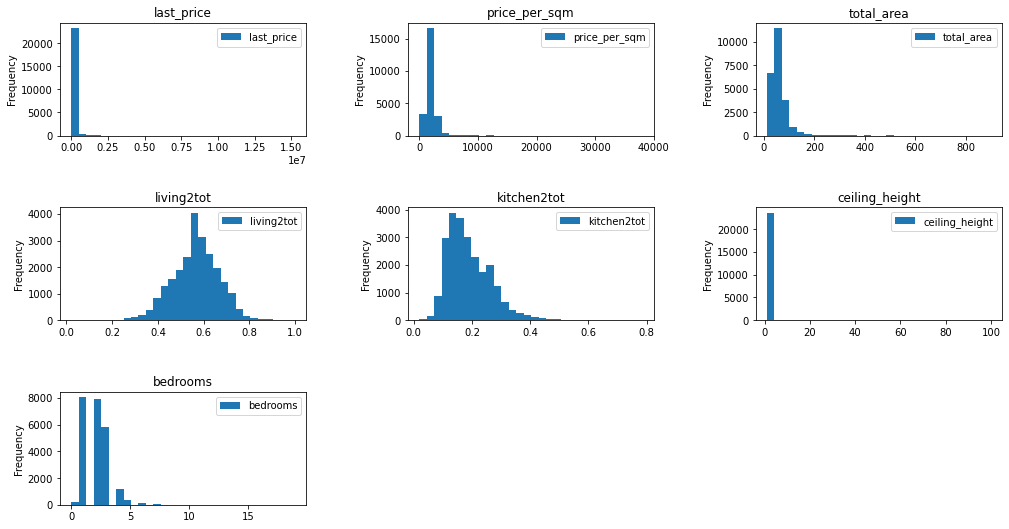

In [20]:
# 2. Let's build histograms for each column 
fig = plt.figure(figsize=(20, 10))

i=0
investigate_cols = ['last_price', 'price_per_sqm', 'total_area', 'living2tot', 'kitchen2tot', 'ceiling_height', 'bedrooms']
 
for col in investigate_cols:
    ax1 = plt.subplot2grid((9, 13), ((i//3)*3, (i%3)*4), colspan=3, rowspan=2)
    ax1.set_title(col, fontsize=12)
    raw_data.plot(kind='hist', y=col, bins=30, label=col, ax=ax1)
    i += 1

The price has anomalies which should be filtered out. 

Let's build a boxplot and make a data slice with typical price not greater 230 000

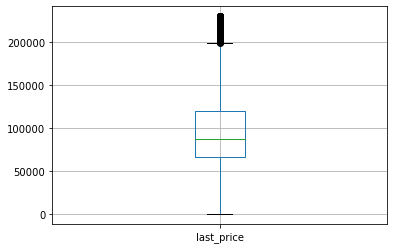

In [21]:
# 3. Let's build a boxplot and make a data slice with typical price not greater 230 000
raw_data.query('last_price < 230000').boxplot('last_price')


Price outliers are concentrated over 200000 mark so let's build the histogram again:

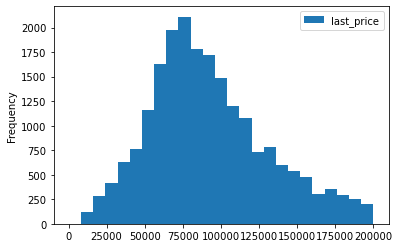

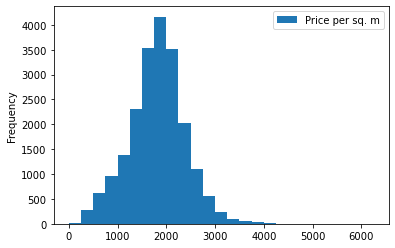

In [22]:
# 4. price outliers are concentrated over 200000 mark so let's build the histogram again:
raw_data.query('last_price < 200000').plot(kind='hist', y='last_price', bins=25, label='last_price')
raw_data.query('last_price < 200000').plot(kind='hist', y='price_per_sqm', bins=25, label='Price per sq. m')

Now the price histogram looks better and closer to the bell shape but still skewed because of the tail. 
Price per sq. meter has more symmetry and looks like normal distribution.
Let's look at the  total area boxplot <200 sq meters

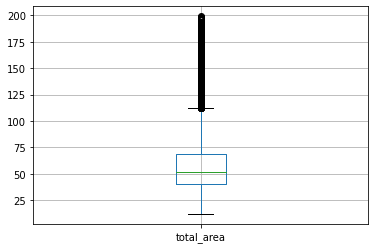

In [23]:
# 5. Let's look at the  total area boxplot <200 sq meters

raw_data.query('total_area < 200').boxplot('total_area')


Outliers exceed 115 meters so let's filter out them and build a histogram once again

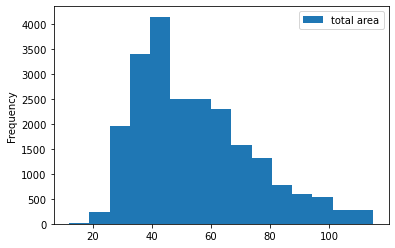

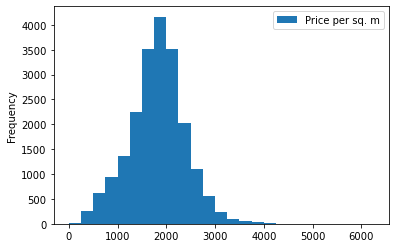

In [24]:
# 6. Outliers exceed 115 meters so let's filter out them and build a histogram once again
raw_data.query('total_area < 115 ').plot(kind='hist', y='total_area', bins=15, label='total area')
raw_data.query('last_price < 200000 and total_area < 115 ').plot(kind='hist', y='price_per_sqm', bins=25, label='Price per sq. m')

From 30 to 45 sq. meters there's a peak: these are the most popular ads now let's look at the ceiling height boxplot

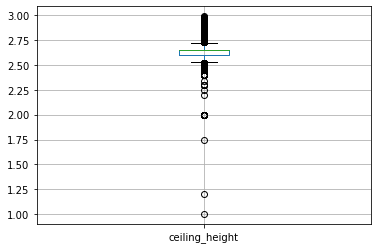

In [25]:
# 7. from 30 to 45 sq. meters there's a peak: these are the most popular ads
# now let's look at the ceiling height boxplot

raw_data.query('ceiling_height < 3').boxplot('ceiling_height')

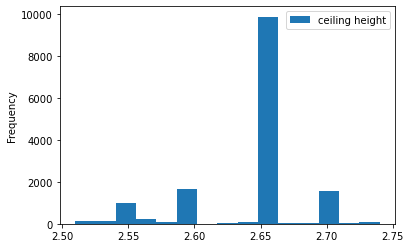

In [26]:
# 8. Let's get rid of outliers and keep only height from 2.5 to 2.75
raw_data.query('ceiling_height < 2.75 and ceiling_height > 2.5').plot(kind='hist', y='ceiling_height', bins=15, label='ceiling height')

Typical ceiling height is 2.65, there are also rear cases 2.7, 2.55 and 2.6, other values should be considered invalid (hard to imagine ceil height of 1 m or 100 m). Let's build the histograms once again on the filetered data.

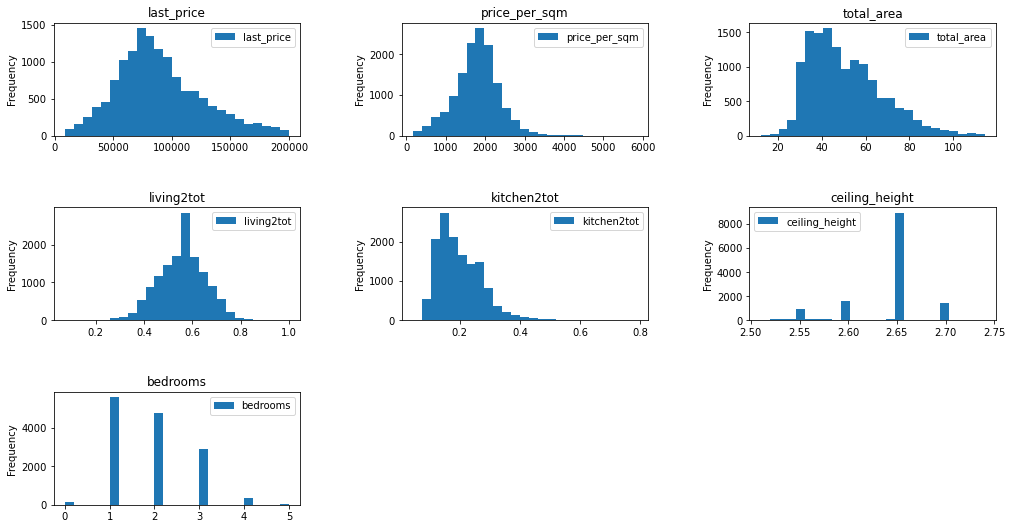

In [27]:
# 9. Let's build the histograms once again on the filetered data.
fig = plt.figure(figsize=(20, 10))
i=0

for col in investigate_cols:
    ax1 = plt.subplot2grid((9, 13), ((i//3)*3, (i%3)*4), colspan=3, rowspan=2)
    ax1.set_title(col, fontsize=12)    
    raw_data.query('last_price < 200000 and total_area < 115 and ceiling_height < 2.75 and ceiling_height > 2.5').plot(kind='hist', y=col, bins=25, label=col, ax=ax1)
    i += 1

### Conclusion on newer histograms

Anomalies in bedrooms disapeared so they are related to area or price outliers. 
- The most typical ads relate to 1, 2, and 3 bedrooms. 
- Living to total area ratio, last price  and price per sq. meter now look as normal distribution. 
- Bedrooms and ceiling height look like categorical values because of building standards
- Total area looks skewed because small apartments area ranges from 30 sq. meters and the range (30, 60) is very popular in the market. At the same time there's a diverse tail of large appartments (>60).

Let's examine the time it's taken to sell the apartment and plot a histogram. 
Calculate the mean and median and explain the average time it usually takes to complete a sale.

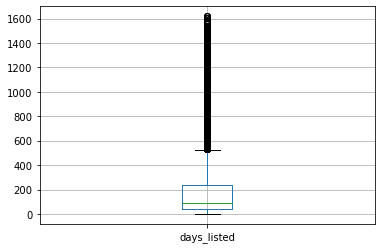

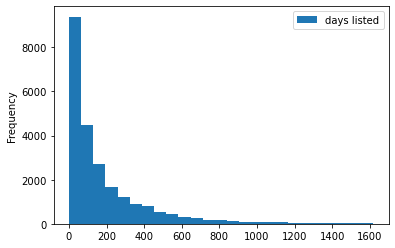

In [28]:
# 10. 
# Let's examine the time it's taken to sell the apartment and plot a histogram. 
# Calculate the mean and median and explain the average time it usually takes to complete a sale.
raw_data.boxplot('days_listed')
raw_data.plot(kind='hist', y='days_listed', bins=25, label='days listed')

Let's get rid of outliers and build the histogram again

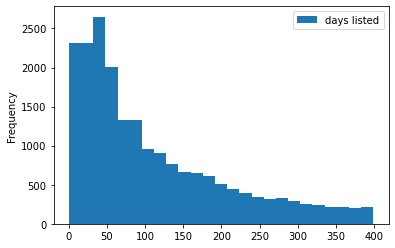

In [29]:
# 11. Let's get rid of outliers and build the histogram again
raw_data.query('days_listed < 400').plot(kind='hist', y='days_listed', bins=25, label='days listed')

In [30]:
# 12. Looks like Poisson distribution.
raw_data.query('days_listed < 400')['days_listed'].agg(['median', 'mean'])

median     74.000000
mean      109.729657
Name: days_listed, dtype: float64

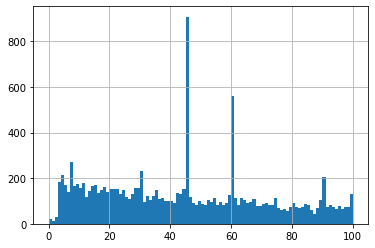

In [31]:
raw_data['days_listed'].hist(range=(0,100), bins=100)

### Conclusion on days_listed
Because of a heavy tail to the right the mean value is greater than the median value. 
 The most of sales occur within 50 days, within 50 to 100 days the sales amount decreases almost 2 times. 
 The more days ad is listed the lower chance it will be sold. It can be explained by the newer ads which are at the top
 of the list and it's harder to find the old ad.
 So we can consider sales within 50 to 100 days as average speed sales, sales within 1 to 50 days as quick sales and 
 sales which take more than 100 days as time consuming sales.

We also saw that on regular basis (30, 45, 60 and 90 days) there are peaks of days_listed field. It might relate to ads system rules which might have a limitation for ad lifetime: if the user does not prolong the ad (or pay for it) it automatically becomes inactive or deleted.

### Determine main factors
Let's examine whether the value (price per sq. m) depends on the
- total square area, 
- number of rooms, 
- floor (top or bottom), 
- the proximity to the city center area. 
- the publication date specifically, 
    - day of the week, 
    - month, 
    - year. 

Let's build scatter plots and correlation matrix for these parameters.

In [32]:
# 13. build the list of parameters and correlation matrix (we'll need only the first row)
parameters = ['price_per_sqm', 'total_area', 'bedrooms', 'city_center_dist', 'dayofweek_posted', 'month_posted', 'year_posted']
raw_data[parameters].corr()


,price_per_sqm,total_area,bedrooms,city_center_dist,dayofweek_posted,month_posted,year_posted
price_per_sqm,1.000000,0.301960,0.055420,-0.325750,-0.007272,-0.001995,0.008516
total_area,0.301960,1.000000,0.758344,-0.239651,-0.004695,0.004920,-0.079912
bedrooms,0.055420,0.758344,1.000000,-0.197595,-0.004134,-0.004469,-0.055418
city_center_dist,-0.325750,-0.239651,-0.197595,1.000000,0.006794,-0.006030,0.033589
dayofweek_posted,-0.007272,-0.004695,-0.004134,0.006794,1.000000,0.011496,-0.004799
month_posted,-0.001995,0.004920,-0.004469,-0.006030,0.011496,1.000000,-0.269642
year_posted,0.008516,-0.079912,-0.055418,0.033589,-0.004799,-0.269642,1.000000


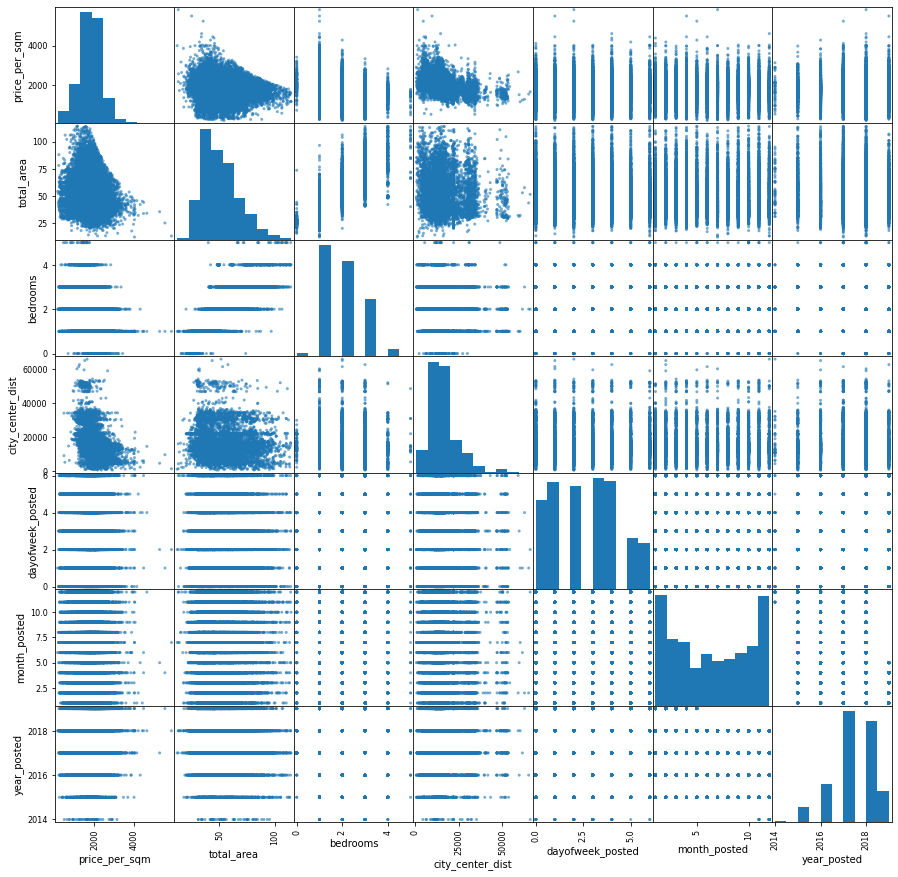

In [33]:
# 14. for the filtered data let's build scatter matrix and consider the first row
good_data = raw_data.query('last_price < 200000 and total_area < 115 and ceiling_height < 2.75 and ceiling_height > 2.5')[parameters]
axes = pd.plotting.scatter_matrix(good_data, figsize=(15,15), alpha=0.6)

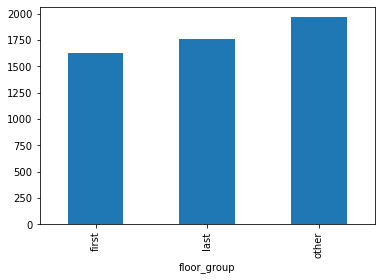

In [34]:
# 15. Build barplot for the floor group
raw_data.groupby('floor_group')['price_per_sqm'].median().plot(kind='bar')

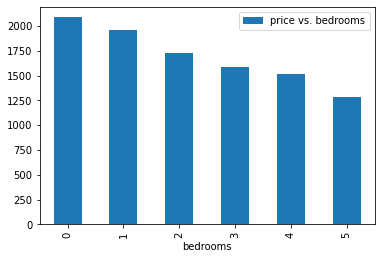

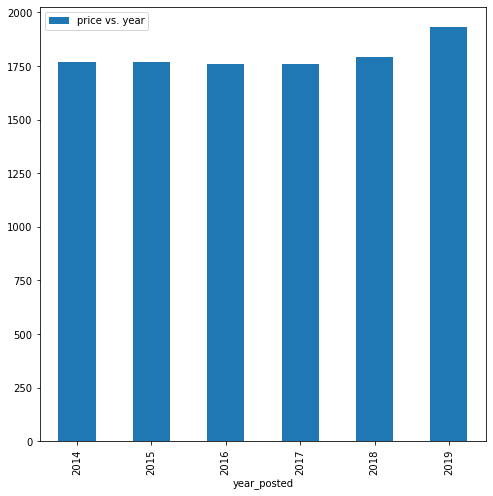

In [35]:
# Build bar plot for bedrooms and year
good_data.groupby('bedrooms')['price_per_sqm'].mean().plot(kind='bar', label='price vs. bedrooms', legend=True)
plt.show()
good_data.groupby('year_posted')['price_per_sqm'].mean().plot(kind='bar', label='price vs. year', legend=True, figsize=(8,8))
plt.show()

###  Conclusion on the main factors

- The total area and the number of bedrooms have the similar influence on the price: the more area/bedrooms the lower price variance and the lower maximum (but the bigger the minimum) price per sq. meter (the dots form the angle shape). At the same time correlation coeff does not show a strong correlation because the variance of the price is big. The average price drops as the number of bedrooms/total area increase.
- City center distance has a negative correlation (also not very strong: -0.326) but generally the lower the distance the higher the price.
- The **cheapest** are ads selling **first** floor apartments, next last floor apartments come, the most **expensive** are the **others**. First and last floor flats have a number of disadvantages which influence the price (e.g. roof or basement problems)
- Post date almost have no influence on the price (~0 correlation), except the **year**: the average price was almost the same from 2014 to 2017 and increased from 2017 to 2019.

### Top 10 localities
Let's select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. Determine which ones have the highest and lowest housing prices.

In [36]:
# 16. Build a list of top 10 localities
top_locs = raw_data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)[:10]
# Get a slice from the data for the top 10 localities
top_locs_data = raw_data.query('locality_name in @top_locs.index')
top_locs_pivot = top_locs_data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['mean', 'median'])
top_locs_pivot.columns = ['mean', 'median']
top_locs_pivot.sort_values('mean')

,mean,median
locality_name,,
Vyborg,1162.838183,1163.166397
Vsevolozhsk,1373.089507,1315.789474
Gatchina,1374.922923,1355.932203
Kolpino,1508.491516,1494.474969
Shushary village,1573.547285,1537.523452
Murino village,1713.635239,1717.563507
Pargolovo village,1803.518265,1832.857143
Kudrovo village,1849.470888,1837.209302
Pushkin,2062.516436,2000.000000


### Conclusion on top 10 localities

- **Median** and **mean** prices per sq. meter are very close to each other for top 10 localities. 
- The **lowest** prices are in *Vyborg* and the **highest** in *Saint Petersburg*.

### Distance influence on the price

Let's select apartments in Saint Petersburg and pinpoint which area is considered to be in the city center. 

In order to do that, let's: 
- create a column with the distance to the city center in km and round to the nearest whole number. 
- calculate the average price for each kilometer 
- plot a graph to display how prices are affected by the distance to the city center. 
- find a place on the graph where it shifts significantly. That's the city center border

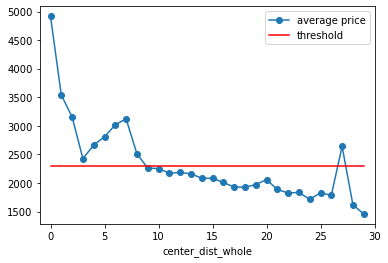

In [54]:
# 17. Select the data for Saint Petersburg and create a new dataframe to work with.

SP_data = pd.DataFrame(top_locs_data.query('locality_name=="Saint Petersburg"') )
# Convert meters to kilometers and round
SP_data['center_dist_whole'] = (SP_data['city_center_dist']/1000).round()
# Plot the average price per kilometer
dist_price = SP_data.groupby('center_dist_whole')['price_per_sqm'].mean()
max_count = dist_price.values.reshape(-1,1).shape[0]
ax = dist_price.plot(style='o-', label='average price', legend=True)
# Take the average price from the previous step (2297 km) and plot a line with average price border
X = range(max_count)#SP_data['price_per_sqm'].values.reshape(-1,1)
plt.xlim((-1,max_count))
Y = np.full((max_count, 1), 2297)
plt.plot( X,Y, color='red', label='threshold')
plt.legend()

There's a price drop at 3 km, then the price returns to high values and drops once again at 9 km. 
Within the 9 km distance the price is above the average price.
Probably the 3 km area has some disadvantages though it's inside the center. 

Let's check the maximum price to compare with average 

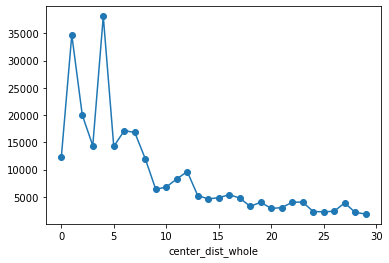

In [55]:
# Let's check the maximum price to compare with average 
SP_data.groupby('center_dist_whole')['price_per_sqm'].max().plot(style='o-')

### Conclusion

- The city center border is at 9 km distance: inside 9 km radius the price is above the average price 
- the mean and max prices significantly shift at 9 km border.
- Within the city center the prices drop at 3 km distance probably because of some disadvantages in the area or probably the reason is the river Neva, it just washes the city center at this distance

### Correlation between parameters

Let's:
- select all the apartments in the city center
- examine correlations between the following parameters: 
    - total area, 
    - price, 
    - number of rooms, 
    - ceiling height. 
- identify the factors that affect an apartment’s price: 
    - number of rooms, 
    - floor, 
    - distance to the city center, 
    - ad publication date. 
- Draw the conclusions. Are they different from the overall deductions about the entire city?

In [49]:
# 18. Select city center ads and get the correlations

corr_parameters = ['total_area','price_per_sqm','bedrooms','ceiling_height']
center_ads = SP_data.query('center_dist_whole<9')[corr_parameters]
center_ads.corr()



,total_area,price_per_sqm,bedrooms,ceiling_height
total_area,1.000000,0.253867,0.743004,0.034843
price_per_sqm,0.253867,1.000000,0.012628,0.087765
bedrooms,0.743004,0.012628,1.000000,0.022240
ceiling_height,0.034843,0.087765,0.022240,1.000000


- The strongest correlation is between the total area and bedrooms parameters. This makes sense: the more bedrooms the more total area is.
- The price correlates to total area but the correlation is weak (~0.25)
- Other parameter pairs almost have no correlation.

Price correlation to bedrooms             is   0.01 in the center and   0.04 for the whole city
Price correlation to floor                is   0.11 in the center and   0.05 for the whole city
Price correlation to center_dist_whole    is  -0.07 in the center and  -0.31 for the whole city
Price correlation to dayofweek_posted     is   0.01 in the center and   0.00 for the whole city
Price correlation to month_posted         is  -0.02 in the center and  -0.01 for the whole city
Price correlation to year_posted          is   0.00 in the center and   0.02 for the whole city


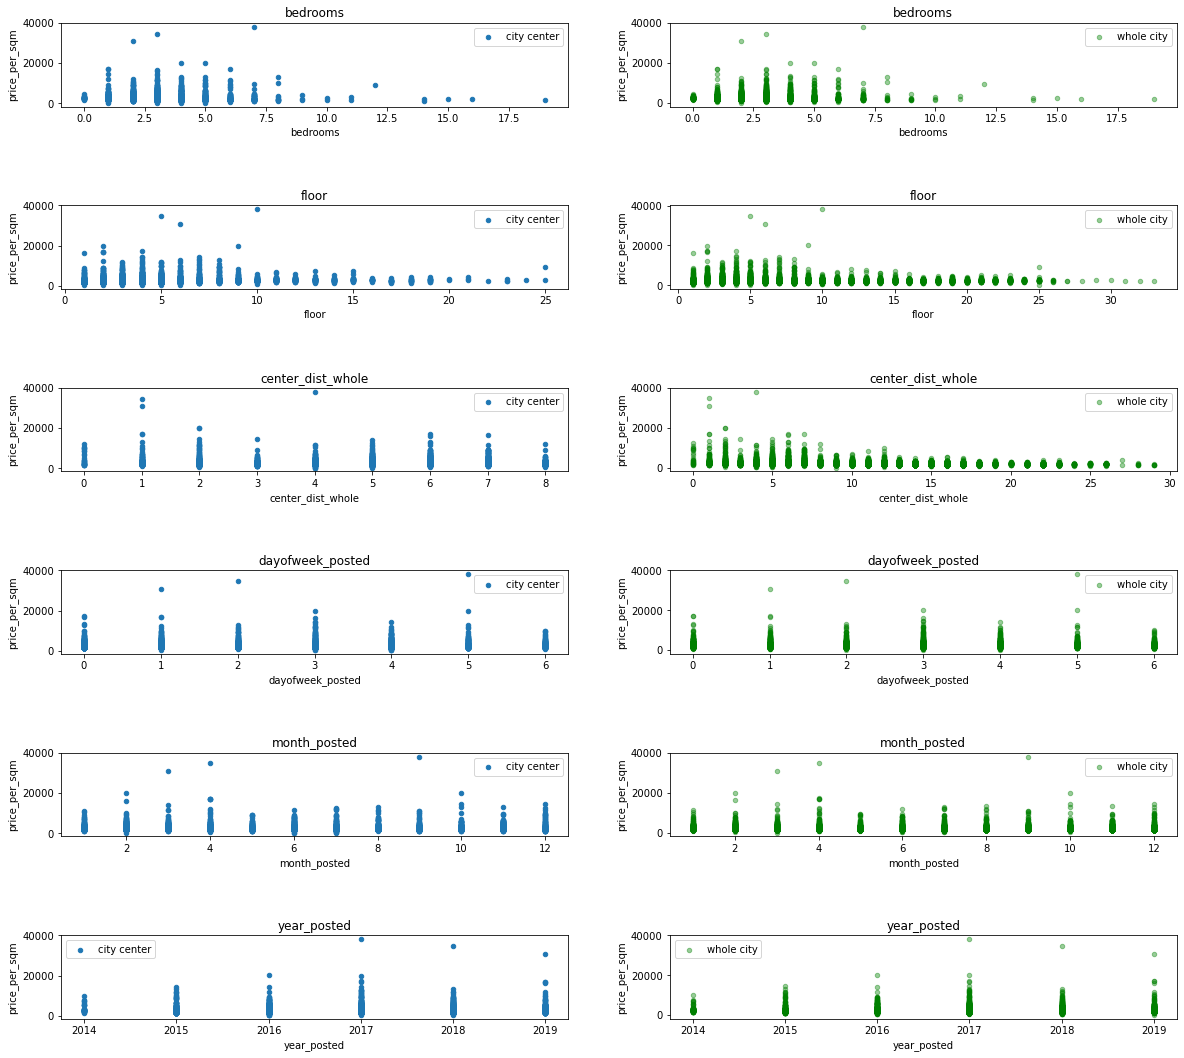

In [71]:
# 19. Identify the factors affecting the price in the city center and whole city:
factors = ['price_per_sqm', 'bedrooms','floor',  'center_dist_whole',  'dayofweek_posted', 'month_posted', 'year_posted']
# select city center data
center_ads2 = SP_data.query('center_dist_whole<9')[ factors]

fig = plt.figure(figsize=(20, 20))
i=0
# for each factor print the correlation and build a scatter plot
for factor in factors:
    if factor=='price_per_sqm':
        continue
    print("Price correlation to {: <20} is {:>6.2f} in the center and {:>6.2f} for the whole city".format( factor, 
         center_ads2['price_per_sqm'].corr(center_ads2[factor]), SP_data['price_per_sqm'].corr(SP_data[factor]) ))
    ax1 = plt.subplot2grid((24, 13), (4*i, 0), colspan=6, rowspan=2)
    ax1.set_title(factor, fontsize=12)       
    ax=center_ads2.plot(kind='scatter', x=factor, y='price_per_sqm', label='city center', legend=True, ax=ax1)
    ax2 = plt.subplot2grid((24, 13), (4*i, 7), colspan=6, rowspan=2)
    ax2.set_title(factor, fontsize=12)         
    SP_data.plot(kind='scatter',  x=factor, y='price_per_sqm', color='green', label='whole city', alpha=0.4, legend=True,ax=ax2)
    i += 1



- We haven't got a strong correlation between the price and any of the factors for the city center or the whole city.
- Scatter plots show the **categorical** nature of the factors so we need further investigate them and build bar plots.
- There's a small *positive* correlation (0.11) for the floor number in the **city center** (the higher you live in the center the more marvelous view you have). But starting from the floor 9 there's a significant drop of the max price (perhaps, high buildings are built close to the city center border which influences the price). 
- There's a small *negative* correlation (-0.31) for the city center distance for the **whole city** (the farther from the center the cheaper an apartment)

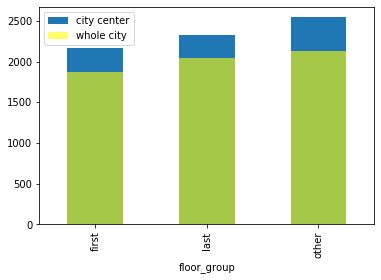

In [51]:
# Plot Bar plot to complare floor group influences

center_ads2['floor_group'] = SP_data['floor_group']
ax=center_ads2.groupby('floor_group')['price_per_sqm'].median().plot(kind='bar', label='city center', legend=True)
SP_data.groupby('floor_group')['price_per_sqm'].median().plot(kind='bar', ax=ax, color='yellow', alpha=0.6, label='whole city', legend=True)

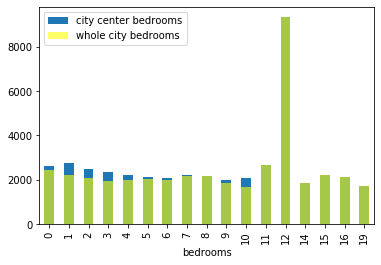

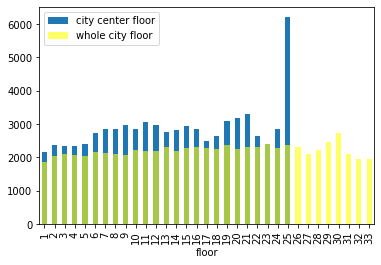

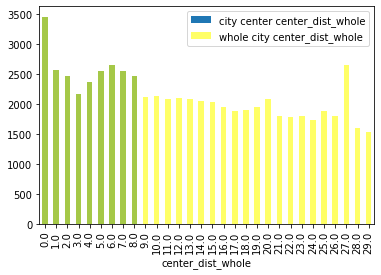

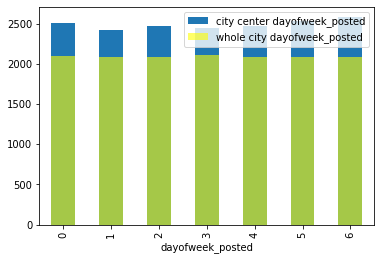

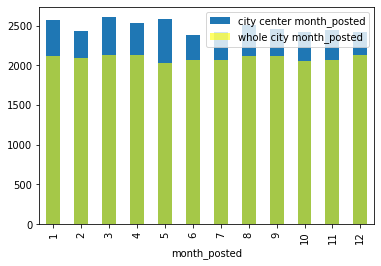

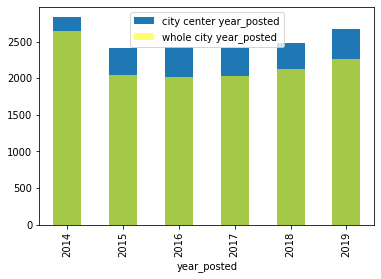

In [52]:
for factor in factors:
    if factor=='price_per_sqm':
        continue
    ax=center_ads2.groupby(factor)['price_per_sqm'].median().plot(kind='bar', label='city center '+factor, legend=True)
    SP_data.groupby(factor)['price_per_sqm'].median().plot(kind='bar', ax=ax, color='yellow', alpha=0.6, label='whole city '+factor, legend=True)
    ax=None
    plt.show()


### Main factors conclusions

- The **floor group** has the same influence (for both: city center and the whole city) on the price as we saw above: 
    - the **cheapest** floor is the **first** floor
    - the **middle**  prices are for the **last** floor
    - the most **expensive** are floors which are **not** *the last or the first*
- The number of **bedrooms** has the similar effect for city center and the whole city:
    - the average price drops as the number of rooms increases till the value of 6 bedrooms. 
    - the price behaves as waves for bedrooms >6 because such flats are not common (even 4 to 6 rooms are not common) and there're individual factors for them and the number of such ads is very low for the good statistics...
- As we saw during correlation analysis **floor number** has influence just for the city center while for the whole center it does not matter:
    - the price increases in the range from 1st to 11th floor in the city center
    - for floors >11 we observe price waves because of individual additional factors. Perhaps, higher buildings are built farther from the city center so the price may drop.
- As we earlier saw **city center distance** has an influence on the price: far from the center - cheaper the price.
    - in the **city center** there's an average price drop at 3 km radius, then from 3-9 km the price again increases
    - for the **whole city** the price gradually drops as the distance increases (except outliers at 27 km)
- **Post date** has similar effect for both **city center** and **whole city**:
    - day of the week and month do not influence the price
    - year is the main factor: prices droped in 2015 and from 2015 to 2019 started gradually to grow.


### Step 5. Overall conclusion

We've studied the data on real estate ads and observed the following:

- The data had missing values probably caused by:
    - data unavailability or calculation/technical errors (distance related parameters, area, ceiling height, floors_total, days_listed)
    - default value not filled properly for *balconies*, *bike_parking*
    - input errors 
- We filled the missing data by the:
    - typical (median) values.
    - used linear regression for living_area as it highly correlates with total_area
    - guessed some distance parameters based on locality
    - guessed some default values
- We've converted data types to datetime, int to optimize and simplify calculations.
- Data contained no duplicated records
- We've added supplementary columns to simplify the analysis:
    - price per sq.m
    - day of the week/month/year of the ad post
    - living/kitchen area to total area ratio
- We've built boxplots and histograms to verify parameter distributions:
    - *Living to total area ratio, last price and price per sq. meter* looked similar to **normal** distribution because they depend on several random independent factors
    - *Bedrooms and ceiling height* look like categorical values because of building standards
    - *Days_listed* distribution is similar to **Poisson** distribution. The more days ad is listed the lower chance it will be sold. Due to some publication rate newer ads replace older ones.
- We've studied the main factors that influense the price:
    - **total area and the number of bedrooms**: the average price drops as the number of bedrooms/total area increase.
    - **city center distance** has a negative correlation: the lower the distance the higher the price.
    - ads selling **first** floor apartments are the **cheapest**, next **last** floor apartments come, the **others** are the most **expensive**. First and last floor flats have a number of disadvantages which influence the price (e.g. roof or basement problems)
    - **Post year**: the average price was almost the same from 2014 to 2017 and increased from 2017 to 2019.
- We've studied in more detail top 10 localities and St. Petersburg city center:    
    - we determined city center border plotting the price vs. center distance and observed price shift at **9 km**
    - **floor number** has a unique value for the city center while it does not matter for the whole city
- Other factors have common influence on the price:
    - **year**: prices droped in 2015 and from 2015 to 2019 started gradually to grow
    - **bedrooms**: average price drops as the number of rooms increases till the value of 6 bedrooms.
    - **floor group**: the **cheapest** floor is the **first** floor, the most **expensive** are floors which are **not** *the last or the first*

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn